In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import re

In [18]:
# Load datasets
train_data = pd.read_csv('train.csv')

# Data Preprocessing
# Check for missing values and drop rows with missing 'title', 'text', or 'label'
train_data.dropna(subset=['title', 'text', 'label'], inplace=True)

def clean_text(text):
    """
    Preprocess the text by removing unwanted characters and patterns.
    """
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

# Apply this cleaning function to the content
train_data['cleaned_content'] = (train_data['title'] + ' ' + train_data['text']).apply(clean_text)
# Example: Show the first few cleaned entries
print(train_data['cleaned_content'].head())

0    house dem aide we didnt even see comeys letter...
1    flynn hillary clinton big woman on campus brei...
2    why the truth might get you fired why the trut...
3    civilians killed in single us airstrike have b...
4    iranian woman jailed for fictional unpublished...
Name: cleaned_content, dtype: object


In [ ]:
from wordcloud import STOPWORDS
custom_stopwords = set(STOPWORDS).union({'news', 'said', 'author'})
wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white').generate(text_data)


<ipython-input-11-b3f0dfc7a2a3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_data, palette='Set2')


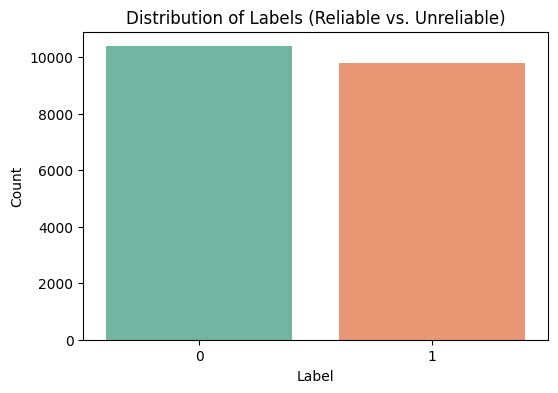

In [11]:
# Data Analysis
# Distribution of Labels
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_data, palette='Set2')
plt.title('Distribution of Labels (Reliable vs. Unreliable)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

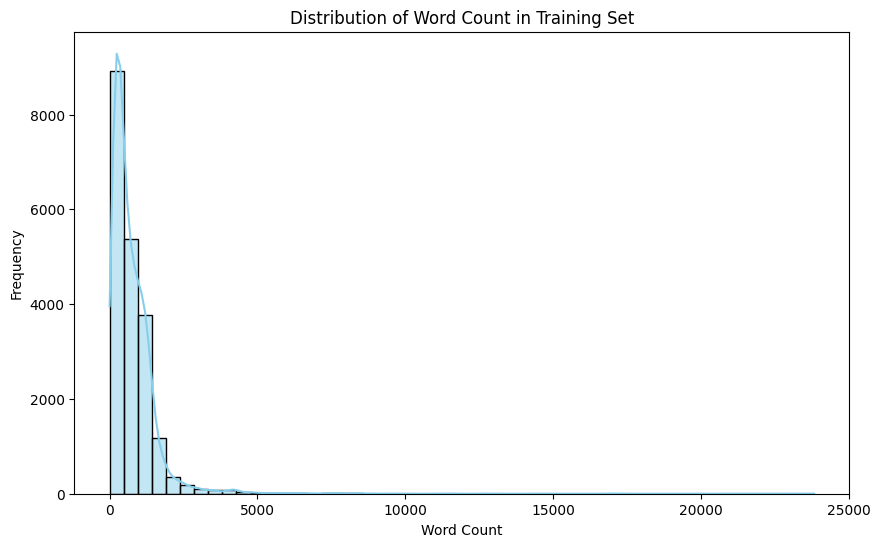

In [15]:
# Word Count Analysis (for insight into text length)
train_data['word_count'] = train_data['cleaned_content'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_data['word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Word Count in Training Set')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tffeature = tfidf.fit_transform(train_data['cleaned_content'])
label = train_data['label']

X_train,X_test,y_train,y_test = train_test_split(tffeature,label,test_size=0.40, random_state=42)



# Model Training and Evaluation
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB()
}

results = {}
confusion_matrices = {}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'\n{model_name} Accuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred))

    # Store confusion matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm

# Data Analysis (Accuracy Comparison Bar Graph)
model_names = list(results.keys())
accuracies = list(results.values())


Random Forest Accuracy: 0.9576
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4153
           1       0.96      0.96      0.96      3929

    accuracy                           0.96      8082
   macro avg       0.96      0.96      0.96      8082
weighted avg       0.96      0.96      0.96      8082


Logistic Regression Accuracy: 0.9448
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      4153
           1       0.93      0.96      0.94      3929

    accuracy                           0.94      8082
   macro avg       0.94      0.95      0.94      8082
weighted avg       0.95      0.94      0.94      8082


SVM Accuracy: 0.9555
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4153
           1       0.94      0.97      0.95      3929

    accuracy                           0.96      8082
   macro avg       0.96      0.96   

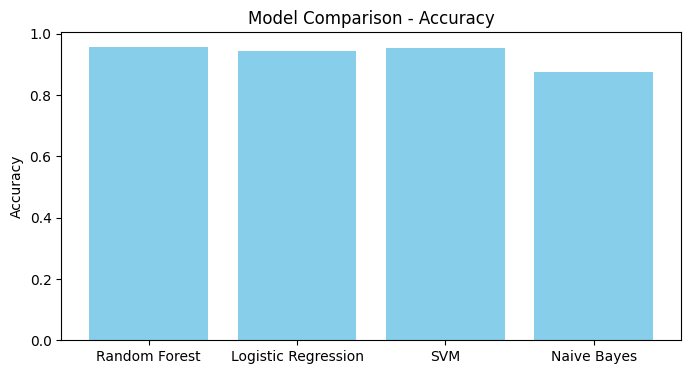

In [25]:
plt.figure(figsize=(8, 4))
plt.bar(model_names, accuracies, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.show()

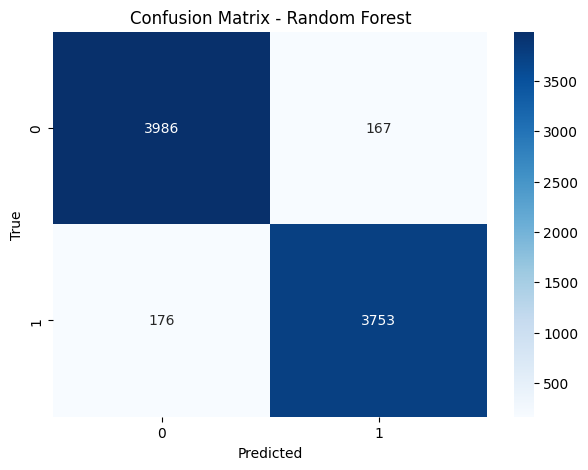

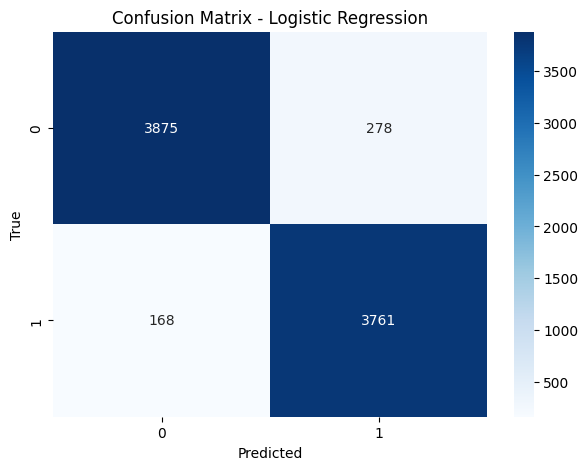

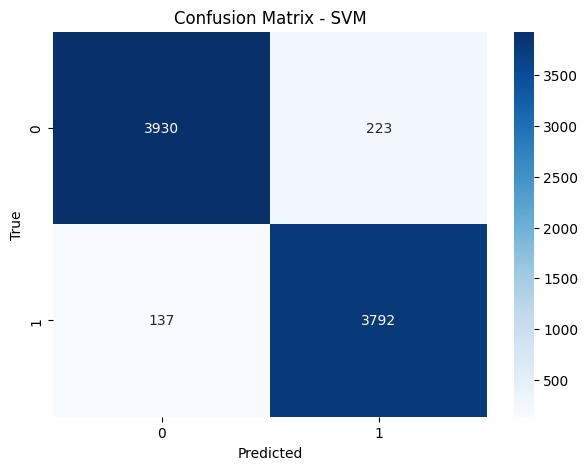

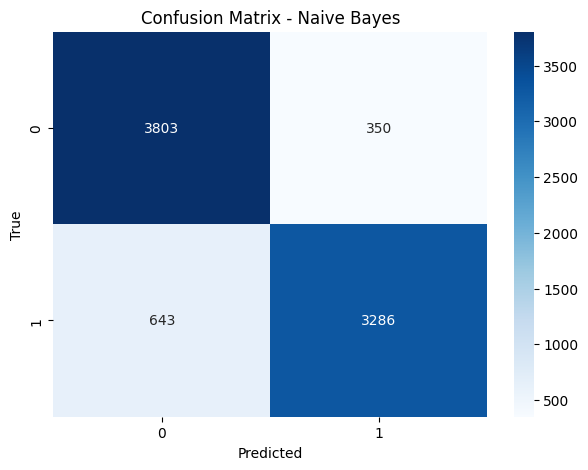

In [26]:
# Plot confusion matrices for all models
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(7, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()